# Colored Hypergraphs

In this tutorial, you will learn about colored hypergraphs in `TopoNetX`, which are mathematical structures that can be depicted like this:

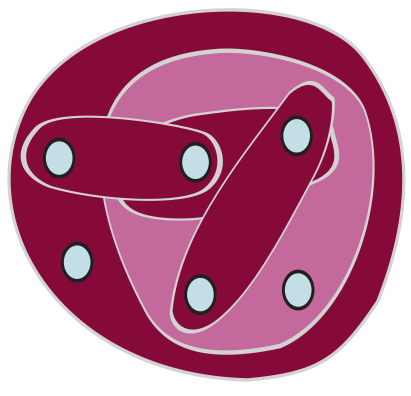

In [ ]:
from IPython.display import Image

Image("chg.png")

## Setup

In [2]:
import toponetx as tnx

## Colored Hypergraph

Certainly! Let's format the definition and example using LaTeX notation with dollar signs around the math expressions for use in a Jupyter notebook.

### Definition:

A colored hypergraph is defined as a triplet $$(\mathcal{V}, \mathcal{X}, rk),$$ where $\mathcal{V}$ is the set of vertices, $\mathcal{X}$ is the set of hyperedges, and $rk: \mathcal{X} \to \mathbb{Z}^+$ is a coloring function.

Additionally, we assume that every node has color 0.

### Example of a Colored Hypergraph

Suppose $\mathcal{V} = \{a, b, c, d\}$, and the set of hyperedges $\mathcal{X}$ is given by:

$$ \mathcal{X} = \{\{a, b\}, \{b, c, d\}, \{c, d\}, \{a, b, c\}\} $$

And the coloring function $rk$ is defined as:

$$ rk(\{a, b\}) = 1, \quad rk(\{b, c, d\}) = 2, \quad rk(\{c, d\}) = 3, \quad rk(\{a, b, c\}) = 1 $$

In this example, each hyperedge is assigned a color according to the function $rk$. The hyperedges $\{a, b\}$ and $\{a, b, c\}$ both have color 1, the hyperedge $\{b, c, d\}$ has color 2, and the hyperedge $\{c, d\}$ has color 3.


### Intuition:

A hypergraph is a generalization of a graph where an edge can connect more than two vertices. When we introduce colors to the hypergraph, we're adding an additional layer of information. Each hyperedge is now associated with a color, providing a way to categorize and distinguish different types of connections between vertices.

Here's an intuitive understanding:

1. **Vertices and Hyperedges:**
   - Vertices represent individual elements or entities.
   - Hyperedges represent connections or relationships that involve more than two vertices.

2. **Colors:**
   - Colors add a distinctive feature to the hyperedges.
   - Each color corresponds to a specific type or category of connection.

3. **Coloring Function \(rk\):**
   - The coloring function \(rk\) assigns a color to each hyperedge.
   - It helps define the rules for coloring and provides a systematic way to categorize the hyperedges.

4. **Example:**
   - Think of vertices as people and hyperedges as groups of friends.
   - The hyperedges represent different social circles or gatherings.
   - Colors indicate the nature of these gatherings (e.g., work-related, family-related, hobby-related).

5. **Use Cases:**
   - Colored hypergraphs can model complex relationships in various domains.
   - In social networks, colors might represent different types of interactions (e.g., professional, personal).
   - In biology, colors could signify different types of molecular interactions within a system.



### Example of a Colored Hypergraph

![](chg.png)

This is an example of a colored hypergraph (CHG), this example has six cells of rank 0, three cells of rank 1 and two cells of rank 2. As we can see this is different to a cell complexes (CC) as cells of rank 2 can contain cells of rank 0 without needing cells of rank 0 also. 

To express this example as code we may use the `add_cell` function. Examples of this can be seen below.

In [3]:
example = tnx.ColoredHyperGraph()

example.add_cell([1, 2], rank=1)
print(example)

example.add_cell([1, 3], rank=1)
print(example)

example.add_cell([1, 2, 4, 3], rank=2)
print(example)

example.add_cell([2, 5], rank=1)
print(example)

# example.add_cell([2, 6, 4], rank=2)
# print(example)
example.add_cell([1, 2, 4, 3, 5, 6], rank=1)
print(example)

Colored Hypergraph with 2 nodes and hyperedges with colors [1] and sizes (1,) 
Colored Hypergraph with 3 nodes and hyperedges with colors [1] and sizes (2,) 
Colored Hypergraph with 4 nodes and hyperedges with colors [1, 2] and sizes (2, 1) 
Colored Hypergraph with 5 nodes and hyperedges with colors [1, 2] and sizes (3, 1) 
Colored Hypergraph with 6 nodes and hyperedges with colors [1, 2] and sizes (4, 1) 


The output of this code clearly demonstrates how the CHG builds up. The first line of the output comes from adding the 1-cell $[1,2]$. This 1-cell is made up of two 0-cells - therefor the output says we have cells with ranks $[0,1]$ and these cells have sizes $[2,1]$. Sizes refers to the number of cells with that rank, so after our first line of input we have two 0-cells and one 1-cell.

Each further line of input is adding another cell of varying rank. Finally, the last line of output is telling us that we have cells of rank 0, 1 and 2 and that they respectively have sizes of 6, 4 and 1. This is such that we have six 0-cells, three 1-cells and one 2-cell, just like our example figure does.

### Helpful Code Output

If you ever need the list of 0-cells, 1-cells or 2-cells the code below is useful for that. This utilises something called an incidence matrix which is explained later in the tutorial. Knowing the order that cells of each rank is listed in is very important when it comes to understanding the output of adjacency and incidence matrices, using this code allows you to access that information at any time.

In [4]:
row, column, B1 = example.incidence_matrix(0, 1, index=True)
row1, column1, B2 = example.incidence_matrix(1, 2, index=True)
print("rank 0:")
print(row)
print("rank 1:")
print(column)
print("rank 2:")
print(column1)

rank 0:
OrderedDict([((frozenset({1}), 0), 0), ((frozenset({2}), 0), 1), ((frozenset({3}), 0), 2), ((frozenset({4}), 0), 3), ((frozenset({5}), 0), 4), ((frozenset({6}), 0), 5)])
rank 1:
OrderedDict([((frozenset({1, 2}), 0), 0), ((frozenset({1, 3}), 0), 1), ((frozenset({2, 5}), 0), 2), ((frozenset({1, 2, 3, 4, 5, 6}), 0), 3)])
rank 2:
OrderedDict([((frozenset({1, 2, 3, 4}), 0), 0)])


Although at first glance this may appear confusing, once you understand the output format it is quite simple. This output is telling us that:

In the 0-cells, the $0^{th}$ cell is {1}, the $1^{st}$ cell is {2}, and so on until reaching the $6^{th}$ cell which is {6}.

In the 1-cells, the $0^{th}$ cell is {1,2}, the $1^{st}$ cell is {1,3},$2^{nd}$ cell is {2,5} and the $3^{rd}$ cell is {1,2,3,4,5,6}.

In the 2-cells, the $0^{th}$ cell is {1,2,3,4}.

Comparing this information to the diagram of our example, we see that all the cells of each rank are listed, and now we also know their order. 

## Adjacency

### Adjacency Matrix

An *adjacency matrix*, is a square matrix that compares a class of objects to themselves (hence being square). Entries in an adjacency matrix are zero if they are not adjacent, and non-zero if they are adjacent $[5]$. 

$$
A_{XY}(i,j) = \begin{cases}
      1 & \text{if the } i\text{-th } X\text{-cell is adjacent to the } j\text{-th } X\text{-cell by both being members of the same } Y\text{-cell} \\
      0 & \text{otherwise}
    \end{cases}
$$



    
Where $X$, $Y$ are colors.


In our example there are 3 ranks, this means the number of adjacency matrices that we can make is 3; A01, A02, A12. Any other combination would be impossible as cells can only be adjacent via a cell of a higher rank. 

In [5]:
A01 = example.adjacency_matrix(0, 1).todense()
print(A01)

[[0 1 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 0 1 1 1]
 [1 1 1 0 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]]


As this is A01 matrix, it is comparing if 0-cells are related to other 0-cells via any 1-cells. The matrix is square, due to the fact it is comparing each 0-cell to every other 0-cell - it is not important which 1-cell they are adjacent by. Here we can see that the matrix is symmetric, this is due to the fact that the CHG is not directed. 

To remind ourselves, 

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}, 3: {1,2,3,4,5,6}.

Looking at the output, the $0^{th}$ row tells us that the $0^{th}$ 0-cell is adjacent to the $1^{st}$ and $2^{nd}$ 0-cells. That is, {1} is adjacent to {2} and {3} via some 1-cell. By looking at our list of 1-cells it is easy to see that {1,2},{1,3} & {1,2,3,4,5,6} are the 1-cells that {1} is adjacent to {2}, {3} via. 

The $2^{nd}$ row tell us that $2^{nd}$ 0-cell is adjacent to the $0^{th}$ 0-cell. This is such that {3} is adjacent to {1} via a 1-cell. The rest of the entries in that row are 0, which means {3} is only adjacent via a 1-cell to {1}, this is evident by looking at the diagram of our example.

In [6]:
A02 = example.adjacency_matrix(0, 2).todense()
print(A02)

[[0 1 1 1 0 0]
 [1 0 1 1 0 0]
 [1 1 0 1 0 0]
 [1 1 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


/home/mkarri/anaconda3/envs/tmx/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


This is the A02 matrix, this is comparing which 0-cells are adjacent via 2-cells.

To remind ourselves,

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-2*: 0: {1,2,3,4}.

Looking at the output, the $0^{th}$ row tells us that the $0^{th}$ 0-cell is adjacent to the $1^{st}$, $2^{nd}$ and $3^{rd}$ 0-cells via 2-cells. That is, {1} is adjacent to {2}, {3} and {4} via a 2-cell. Looking at our list of 2-cells or the diagram, it is obvious this is via the 2-cell {1,2,3,4}. 

The $4^{th}$ row is all zero entries, this tells us that the $4^{th}$ 0-cell is not incident to any other 0-cells via a 2-cell. That is, {5} is not incident to any other 0-cells via a 2-cell. Looking at the diagram, we can see this is because {5} is not involved with any 2-cells.

In [7]:
A12 = example.adjacency_matrix(1, 2).todense()
print(A12)

[[0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


This is the A12 matrix, this is comparing which 1-cells are adjacent to each other via a 2-cell.

To remind ourselves,

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}, 3:{1,2,3,4,5,6}

*rank-2*: 0: {1,2,3,4}.

As there are four 1-cells, this matrix is a 4x4 square matrix. 

The output here can be explained in the same way. 

The $0^{th}$ row is showing us that the $0^{th}$ 1-cell is adjacent to the $1^{st}$ 1-cell via a 2-cell. That is, {1,2} is adjacent to {1,3} via a 2-cell - namely {1,2,3,4}.

The $1^{st}$ row is showing us that the $1^{st}$ 1-cell is adjacent to the $0^{th}$ 1-cell via a 2-cell, this is the same information as the $0^{th}$ row but simply mirrored. This 2 cell is {1,2,3,4}. This shows that the $1^{st}$ 1-cell({1,2}) and the $2^{nd}$ 1-cell({1,3}) are a subset of the rank 2 cell i.e. {1,2,3,4}.

The $2^{nd}$ row is showing us that the $2^{nd}$ 1-cell is adjacent to no other 1-cells via a 2-cell. That is {2,5} is not included in any of the 2-cells. 

Similarly, the last row({1,2,3,4,5,6}) is not a subset of any of the rank 2 cells. Hence, its rows are all 0.

### Co-Adjacency Matrix

A *co-adjacency matrix* is a matrix that compares a class of objects to themselves, by seeing if they are coadjacent via some cell of a lower rank. 

That is, do the two cells in the class being compared, both fully contain the same member of a lower class? 

Now let's compute the coadjaceny matrices, CA10, CA20 and CA21, for our original example. 

In [8]:
CA10 = example.coadjacency_matrix(1, 0).todense()
print(CA10)

[[0 1 1 2]
 [1 0 0 2]
 [1 0 0 2]
 [2 2 2 0]]


The CA10 matrix, sees if 1-cells are coadjacent via any shared 0-cells.

To remind ourselves,

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}, 3: {1,2,3,4,5,6}.

The matrix's $0^{th}$ row shows us that {1,2} is coadjacent to {1,3} and {2,5} via some 0-cells. In this case we can see that {1,2} is coadjacent to {1,3} by the 0-cell {1}, is coadjacent to {2,5} by the 0-cell {2} and is coadjacent to {1,2,3,4,5,6} by the 0-cells {2} and {1}.

## Incidence

### Incidence Matrix

An *incidence matrix* is a matrix that shows the relationship between two classes of objects. If the first class is X and the second is Y, the matrix has one row for each element of X and one column for each element of Y. The entry in row x and column y is 1 if x and y are related (called incident in this context) and 0 if they are not $[2]$.

$$BXY(i,j) = \begin{cases}
      1 & \text{if the } i^\text{th} \text{ X-cell is contained in, but not equal to, the } j^\text{th} \text{ Y-cell}\\
      0 & \text{otherwise.}
    \end{cases}$$


For colored hypergraphs, we compare cells of a rank to cells of a higher rank. So for our example, as we only have three ranks we have three possible incidence matrices: B01, B02 and B12. 

In [9]:
B01 = example.incidence_matrix(0, 1).todense()
print(B01)

[[1 1 0 1]
 [1 0 1 1]
 [0 1 0 1]
 [0 0 0 1]
 [0 0 1 1]
 [0 0 0 1]]


B01 is the incidence matrix portraying which 0-cells are incident to which 1-cells. 

To remind ourselves, 

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}, 3:{1,2,3,4,5,6}

So in this matrix, each row represents one of the six 0-cells, and each column represents one of the four 1-cells. 

The $0^{th}$ row of this matrix is showing us that the $0^{th}$ 0-cell, {1}, is incident to the $0^{th}$ and $1^{st}$ 1-cells {1,2} and {1,3}. This is because {1} is contained in both {1,2} and {1,3}. The entry $[0,2]$ of this matrix is zero, which tells us that the $2^{nd}$ 1-cell {2,5} is not incident to {1} - a trivial fact when looking at the cells. 

The 4th column shows all ones as {1,2,3,4,5,6} contains all rank-0 cells.

In [10]:
B02 = example.incidence_matrix(0, 2).todense()
print(B02)

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]]


B02 is the incidence matrix demonstrating which 0-cells are incident to which 2-cells.

To remind ourselves,

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-2*: 0: {1,2,3,4}.

In this marix, each row represents one of the six 0-cells, and the column represents the 2-cells {1,2,3,4}. 

The $0^{th}$ row has a non-zero entry for the $0^{th}$ column. This tells us that {1} is incident to {1,2,3,4}.

In [ ]:
B12 = example.incidence_matrix(1, 2).todense()
print(B12)

B12 is the incidence matrix demonstrating which 1-cells are incident to which 2-cells. 

To remind ourselves, 

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}, 3: {1,2,3,4,5,6}

*rank-2*: 0: {1,2,3,4}.

The $0^{th}$ row tells us that {1,2} is incident to {1,2,3,4}. 

The $1^{st}$ row tells us that {1,3} is incident to {1,2,3,4}.

The $2^{nd}$ row tells us that {2,5} is not incident to {1,2,3,4}. 
 
The $3^{rd}$ row tells us that {1,2,3,4,5,6} is not incident to {1,2,3,4}.

## References

$[1]$ : Hajij, M., Zamzmi, G., Papamarkou, T., Miolane, N., Guzmán-Sáenz, A. and Ramamurthy, K. (n.d.). *Higher-Order Attention Networks*. [online] Available at: https://arxiv.org/pdf/2206.00606.pdf [Accessed 3 Apr. 2023].

$[2]$ : www.scientificlib.com. (n.d.). *Incidence matrix*. [online] Available at: http://www.scientificlib.com/en/Mathematics/LX/IncidenceMatrix.html. [Accessed 3 Jan. 2023].

$[3]$ : Wikipedia. (2023). *Hypergraph*. [online] Available at: https://en.wikipedia.org/wiki/Hypergraph [Accessed 5 Apr. 2023].

$[4]$ : Wikipedia. (2023). *Hierarchy (mathematics)*. [online] Available at: https://en.wikipedia.org/wiki/Hierarchy_(mathematics) [Accessed 5 Apr. 2023].

$[5]$ : www.sciencedirect.com. (n.d.). *Adjacency Matrix - an overview | ScienceDirect Topics*. [online] Available at: https://www.sciencedirect.com/topics/mathematics/adjacency-matrix#:~:text=The%20adjacency%20matrix%20of%20a [Accessed 5 Apr. 2023].

‌